In [13]:
import requests
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [14]:
#URL='https://aqs.epa.gov/data/api/signup?email=yashgokhale19972@gmail.com'
#r=requests.get(url=URL)

In [15]:
key='khakiwolf72'
email='yashgokhale19972@gmail.com'
#rr=requests.get(f'https://aqs.epa.gov/data/api/list/states?email={email}&key={key}')

In [16]:
#d=rr.json()['Data']

In [17]:
def get_states(email,key):
    rr=requests.get(f'https://aqs.epa.gov/data/api/list/states?email={email}&key={key}')
    d=rr.json()['Data']
    states={}
    for i,s in enumerate(d):
        states.update({s['value_represented']:s['code']})   
    return states

In [18]:
#sp=states['Pennsylvania']
#c=requests.get(f'https://aqs.epa.gov/data/api/list/countiesByState?email={email}&key={key}&state={sp}')

In [19]:
def get_counties(email,key,states,s):
    c=requests.get(f'https://aqs.epa.gov/data/api/list/countiesByState?email={email}&key={key}&state={states[s]}')
    cc=c.json()['Data']
    counties={}
    for i,x in enumerate(cc):
        counties.update({x['value_represented']:x['code']})
    return counties

In [20]:
#Working with Pennsylvania
states=get_states(email,key)
cp=get_counties(email,key,states,'Pennsylvania')

In [24]:
#Stores all the parameter classes
crit=requests.get(f'https://aqs.epa.gov/data/api/list/classes?email={email}&key={key}')
cr=crit.json()['Data']
pars={}
for x in cr:
    pars.update({x['value_represented']:x['code']})  
cr2=pars['Pollutants that have an AQI Defined']

In [25]:
#Stores all pars with a particular type
pp=requests.get(f'https://aqs.epa.gov/data/api/list/parametersByClass?email={email}&key={key}&pc={cr2}')
pp2=pp.json()['Data']
param_codes={}
for x in pp2:
    param_codes.update({x['value_represented']:x['code']})  
param_codes

{'Carbon monoxide': '42101',
 'Sulfur dioxide': '42401',
 'Nitrogen dioxide (NO2)': '42602',
 'Ozone': '44201',
 'PM10 Total 0-10um STP': '81102',
 'PM2.5 - Local Conditions': '88101',
 'Acceptable PM2.5 AQI & Speciation Mass': '88502'}

In [26]:
def countydata(email, key, param, bdate, edate, state, county):
    r=requests.get(f'https://aqs.epa.gov/data/api/sampleData/byCounty?email={email}&key={key}&param={param}&bdate={bdate}&edate={edate}&state={state}&county={county}')
    d=r.json()['Data']
    dat=[]
    tim=[]
    mes=[]
    sit=[]
    for i,x in enumerate(d):
        a,b=x['time_local'].split(':')
        tim.append(float(a)+float(b)/60)
        m=(x['sample_measurement'])
        if m:
            mes.append(float(x['sample_measurement']))
        else:
            mes.append(0)
        dat.append(x['date_local'])
        sit.append(x['site_number'])
    df={'Site':sit,'Date':dat,'Time':tim,'Value':mes}
    return pd.DataFrame(df)

In [27]:
sc=states['Pennsylvania']
cc=cp['Allegheny']
par=param_codes['Carbon monoxide']
bdate='20200101'
edate='20200102'

In [28]:
dt=countydata(email,key,par,bdate,edate,sc,cc)
un_sit=dt['Site'].unique()

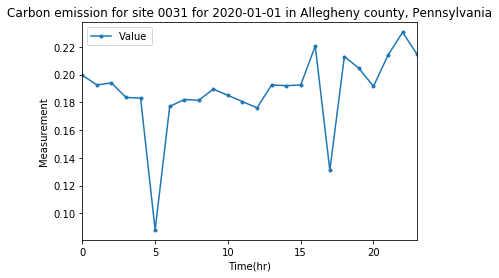

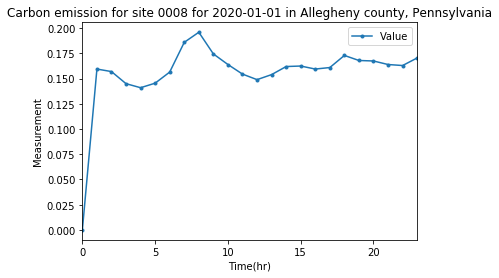

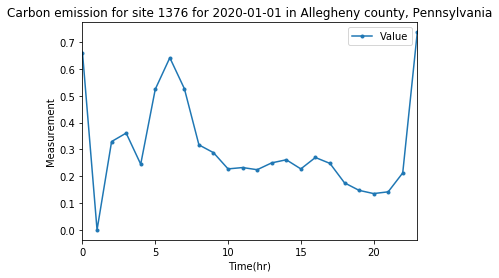

In [29]:
for m in un_sit:
    day=dt['Date'].unique()[0]
    dt.groupby('Site').get_group(m).groupby('Time').mean().plot(style='.-')
#    print(data)
#    plt.plot(data['Time']/60,data['Value'])
    plt.xlabel('Time(hr)')
    plt.ylabel('Measurement')
    plt.title(f'Carbon emission for site {m} for {day} in Allegheny county, Pennsylvania')
    plt.show()

In [38]:
bdate='20200101'
edate='20200331'
dt2=countydata(email,key,par,bdate,edate,sc,cc)

In [40]:
dt2.to_csv('C:/Users/yashg/OneDrive/Desktop/CMU/Summer 2020/COVID_19_Innnovation_Project/2020CO.csv')